In [18]:
import numpy as np 
import math 
import matplotlib.pyplot as plt 
import pandas as pd

<img style="width:900px" src="hw3-1.jpg">

## Question 1b
Consider the explicit finite difference scheme
$\frac{u_j^{n+1} - u_j^n }{k} = \sigma \frac{u_{j-1}^n - 2u_{j}^n +u_{j+1}^n}{h^2} $
for j =1...M-1, n=0,...,N-1, $u_0^n = u_M^n = 0$ Write a code to implement finite difference method, by taking $\alpha = \sigma k / h^2$, test the necessary condition for stability. Consider one value of $\alpha$ for which the scheme is stable and one for which it is not. Plot the corresponding approximate solution.

In [19]:
# step size N=10, mesh size M=50,
N =10
M= 50
#initial Condition u0(x)
u_0 = np.zeros(M+1)
for i in range(0,26):
        u_0[i] = i*math.pi/50
for i in range(26,M+1):
        u_0[i]= math.pi - i*math.pi/50

# let u by a (N+1,M+1) matrix
u=np.zeros((N+1,M+1))
u[0] = u_0
u[:,0] = 0
u[:,-1] = 0


In [20]:
'''
Apply explicit finite difference for j=1,...M-1, n = 0,...N-1
Input: alpha
Output: u-matrix

'''
def Finite_diff(a):
    for n in range(0,N):
        for j in range(1,M):
            u[n+1,j] = a*u[n,j+1]+(1-2*a)*u[n,j]+a*u[n,j-1]
    return u

### test the necessary condition for stability, which is $\alpha \le 0.5$

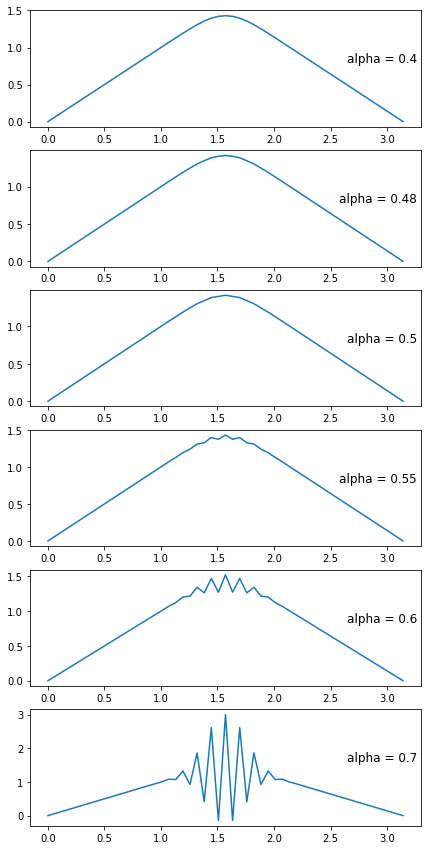

In [21]:
# input different value for alpha and get approx solutions
ux=np.zeros((6,M+1))
a_list = [0.4,0.48,0.5,0.55,0.6,0.7]
fig, axs = plt.subplots(6,1, figsize=(7,15))
for i in range(6):
    ux[i] = Finite_diff(a_list[i])[-1]
    axs[i].plot(np.linspace(0,math.pi, M+1), ux[i])
    axs[i].set_title(f'alpha = {a_list[i]} ',loc="right", y=0.5)
plt.show()


## Question 2a
<img style="width:900px" src="hw3-2.jpg">


## Question 2b, Tridiagonal solver for Backward time diff Method

In [22]:
# Input M-1 * M-1 Matrix A, output its factorization L,U
def factorization_LU(A):
    # create zero-filled matrix L and U 
    n = A.shape[0]   # n = M-1
    L = np.zeros((n,n)) 
    U = np.zeros((n,n))
    # fill m1 
    U[0,0] = A[0,0]
    #fill L and U 
    for j in range (0, n-1): 
        L[j,j]=1 
        U[j,j+1] = A[j,j+1] 
        L[j+1,j]= A[j+1,j]/U[j,j]
        U[j+1,j+1] = A[j+1,j+1] - L[j+1,j]*U[j,j+1]
    return L,U 

def forward_sub(L,u): 
    y= np.zeros(len(u)) 
    #y[0] = u[0] 
    for i in range(1, len(u)): 
        sum_y = sum([L[i,i-1]*y[i-1]]) 
        y[i]=(u[i] - sum_y)
    return y

def backward_sub(U,y): 
    x= np.zeros(len(y)) 
    x[-1] = y[-1]/U[-1,-1] 
    for i in range(len(y)-2, -1, -1): 
        sum_ax = sum([U[i,i+1]*x[i+1]]) 
        x[i]=(y[i] - sum_ax)/U[i,i]
    return x

In [23]:
n =5
M= 50
#initial Condition u0(x)
u_0 = np.zeros(M+1)
for i in range(0,26):
        u_0[i] = i*math.pi/50
for i in range(26,M+1):
        u_0[i]= math.pi - i*math.pi/50
u_0 = u_0[1:-1]

#Create Matrix A for tridiagonal solver, k=h, alpha =1/h
h=math.pi/M 
A=np.zeros((M-1,M-1))
for i in range (0,M-1): 
    A[i,i] = 1+2/h
    if i > 0: 
        A[i, i - 1] = -1/h
        A[i - 1, i] = -1/h

# LU decomposition
L,U = factorization_LU(A)


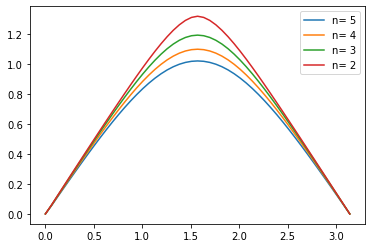

In [24]:
u = np.zeros((n,M-1))
u[0]=u_0
#compute n steps of solutions
for i in range(0,n-1):
    u[i+1] = backward_sub(U,forward_sub(L, u[i]))

labels = ["n= %d" % (n-i) for i in range(4) ]
for k,i in zip(range (-1,-5,-1), range(4)):

    u_n =np.array( [0] +list(u[k,:])+[0])
    plt.plot(np.linspace(0,math.pi,M+1), u_n, label = labels[i])
    plt.legend()

The method: $U^{n+1} = A_{h}^{-1}U^n$

To demonstrate the method is unconditionally stable, we need to show all the eigenvalues of $A_{h}^{-1}$ is bounded by 1.

The eigenvalue can be computed as $\frac{1}{1+\alpha(1-cos(mh))}, m =1, ...,M-1$, which is bounded by 1 regardless of k. Thus the method is unconditionally stable.